# Speed dating dataset: Exploratory Data Analysis (EDA)
## by Kamila Hamalcikova

This dataset cointains almost recors from 8378 participants of Speed Dating Experiment. Data can be found in [Kaggle dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment). They consists mainly of general info about each participant, attributes they look for in speed dating partner and their matching decisions.

#### Table of contents

<ul>
<li><a href="#wrangling">1. Data Wrangling</a></li>
    <ul>
    <li><a href="#questions">1.1 Main questions</a></li>
          
</ul>
    
   <li><a href="#univariate">2. Univariate Exploration</a></li>
 
 
  <ul>
    <li><a href="#age">2.1 Age of participants</a></li>  
  
  <li><a href="#goal">2.2 Goals (reasons for participation in speed dating events)</a></li>
    
  <li><a href="#attribute">2.3 Reasons why people go to speed dating events</a></li>                 
   <li><a href="#race">2.4 Races of participants</a></li>
   <li><a href="#income">2.5 Income of participants</a></li>
       
</ul>
    <li><a href="#bivariate">3. Bivariate Exploration</a></li>
   
 <ul>
    <li><a href="#age_gender">3.1 Participants by age and gender</a></li>  
  
  <li><a href="#race_gender">3.2 Participants by races and gender</a></li>
    
  <li><a href="#reasons_gender">3.3 Reasons why people go to speed dating events by gender</a></li>                 
   <li><a href="#attribute_gender">3.4 Attributes that participants look for in their partners</a></li>
   <li><a href="#income_gender">3.5 Income of participants by gender</a></li>
   <li><a href="#corr_match">3.6 Correlation between match and attributes of participants and their speed dating partners</a></li>
   <li><a href="#corr_men">3.7 Correlation between match and attributes of men and their speed dating partners</a></li>
   <li><a href="#corr_women">3.8 Correlation between match and attributes of women and their speed dating partners</a></li>
   
</ul>
   <li><a href="#findings">4. Summary of Findings</a></li>
</ul>

<a id='wrangling'></a>
## 1. Data wrangling

In [1]:
# Importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# view all possible rows and columns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
# read speed dating dataset
dataset = pd.read_csv("Speed_Dating_Data.csv", encoding = "ISO-8859-1")
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [3]:
# check columns names
dataset.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [4]:
# check data types
dataset.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
positin1    float64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
field_cd    float64
undergra     object
mn_sat       object
tuition      object
race        float64
imprace     float64
imprelig    float64
from         object
zipcode      object
income       object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64


In [5]:
# change gender type from int to string
dataset.gender.value_counts()
dataset["gender_str"] = np.where(dataset["gender"]==1,"Male","Female")
dataset["gender_str"].value_counts()

Male      4194
Female    4184
Name: gender_str, dtype: int64

In [6]:
# check NAN values
dataset.isna().sum()

iid              0
id               1
gender           0
idg              0
condtn           0
wave             0
round            0
position         0
positin1      1846
order            0
partner          0
pid             10
match            0
int_corr       158
samerace         0
age_o          104
race_o          73
pf_o_att        89
pf_o_sin        89
pf_o_int        89
pf_o_fun        98
pf_o_amb       107
pf_o_sha       129
dec_o            0
attr_o         212
sinc_o         287
intel_o        306
fun_o          360
amb_o          722
shar_o        1076
like_o         250
prob_o         318
met_o          385
age             95
field           63
field_cd        82
undergra      3464
mn_sat        5245
tuition       4795
race            63
imprace         79
imprelig        79
from            79
zipcode       1064
income        4099
goal            79
date            97
go_out          79
career          89
career_c       138
sports          79
tvsports        79
exercise    

<a id='questions'></a>
### Main features of interest in the dataset¶

I would like to find out if women and men have similar or different approach to speed dating events.

#### Main questions:
- Do reasons why women and men go to speed dating events differ?
- Are women and men attending speed dating events same in terms of race, age or income?
- Which attributes seek women or men in their speed dating partners?
- What variables correlate with succesful match with partner for women and men?

<a id='univariate'></a>

## 2. Univariate Exploration
- age of participants
- goals (reasons for participation in speed dating events)
- attributes that participants look for in their partners
- races of participants
- income of participants

<a id='age'></a>
### 2.1 Age of participants

In [7]:
# most common age of participants
dataset["age"].value_counts()

27.0    1059
23.0     894
26.0     869
24.0     863
25.0     837
28.0     746
22.0     655
29.0     589
30.0     574
21.0     291
32.0     210
33.0     161
34.0     152
31.0     125
35.0      60
20.0      55
36.0      45
19.0      20
42.0      20
38.0      19
39.0      18
18.0      10
55.0       6
37.0       5
Name: age, dtype: int64

In [8]:
dataset["age"].unique

<bound method Series.unique of 0       21.0
1       21.0
2       21.0
3       21.0
4       21.0
        ... 
8373    25.0
8374    25.0
8375    25.0
8376    25.0
8377    25.0
Name: age, Length: 8378, dtype: float64>

In [9]:
round(dataset["age"].mean(),1)

26.4

In [10]:
dataset["age"] = dataset["age"].fillna(round(dataset["age"].mean(),1))
dataset["age"] = dataset["age"].astype(int)

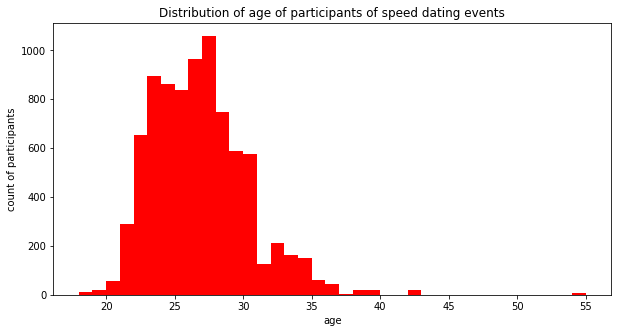

In [11]:
# distribution of age groups
bins = np.arange(dataset.age.min(),dataset.age.max()+1, 1)
plt.figure(figsize=(10, 5))
plt.hist(data=dataset, x="age", bins = bins, facecolor = 'r')
plt.title("Distribution of age of participants of speed dating events")
plt.xlabel("age")
plt.ylabel("count of participants")
plt.show()

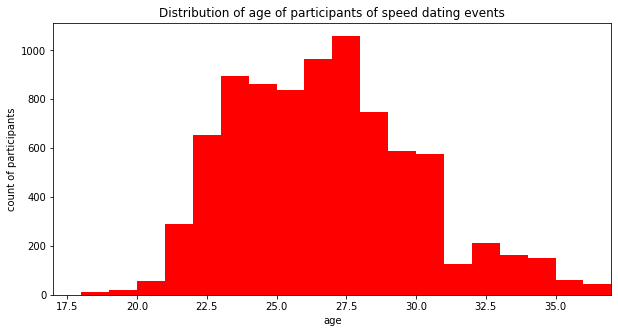

In [12]:
# zooming on age of majority of participants
bins = np.arange(dataset.age.min(),dataset.age.max()+0.5, 1)
plt.figure(figsize=(10, 5))
plt.hist(data=dataset, x="age", bins = bins, facecolor = 'r')
plt.title("Distribution of age of participants of speed dating events")
plt.xlabel("age")
plt.xlim(17, 37)
plt.ylabel("count of participants")
plt.show()

We observed that majority of people participating in speed dating events is age group from 20 to 30 years old.

<a id='goal'></a>
### 2.2 Goals (reasons for participation in speed dating events)

In [13]:
# recoding goal variable from int to string
dataset['goal'] = dataset.goal.apply(lambda x: 
                                     "fun night out" if x == 1
                                     else "meet new people" if x == 2
                                     else "get a date" if x == 3
                                    else "looking for serious relationship" if x == 4
                                    else "to say I dit it" if x == 5
                                    else "other goal" if x == 6
                                    else "no data")

In [14]:
# unique values of goal variable
dataset['goal'].unique()

array(['meet new people', 'fun night out', 'other goal', 'get a date',
       'looking for serious relationship', 'no data', 'to say I dit it'],
      dtype=object)

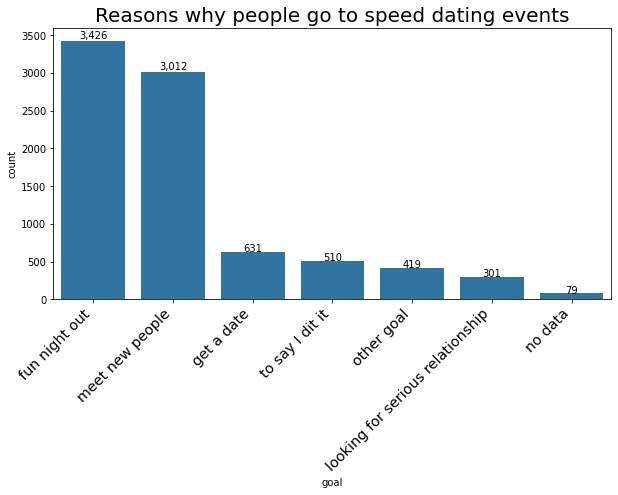

In [15]:
# barchart of reasons for participating in speed dating events
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[0]
chart = sns.countplot(data = dataset, x='goal', color = base_color, order = dataset['goal'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', 
                      fontweight='light', fontsize='x-large')
plt.title("Reasons why people go to speed dating events", fontsize=20)

for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center");

In [16]:
# curious about % of get a date reason from total
(631/dataset['goal'].count())*100

7.531630460730485

Most people go to speed dating events to have fun night out or meet new people. Getting a date is actually primary goal only for 7,5 % participants. 

<a id='attribute'></a>
### 2.3 Attributes that participants look for in their partners

In [17]:
#renaming personal attributes that participants look for in their partners to more clear names
gender_param = dataset[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]
gender_param.columns = ['attractive', 'sincere','intelligent','fun','ambitious','shared_interests']

gender_param_sort = gender_param.mean().sort_values(ascending=False)
gender_param_sort

attractive          22.514632
intelligent         20.265613
fun                 17.457043
sincere             17.396389
shared_interests    11.845111
ambitious           10.682539
dtype: float64

Participants of speed dating events look for attractive and intelligent counterparts. Being ambitious is the least important personal attribute for speed dating partner.

<a id='race'></a>
### 2.4 Races of participants

In [18]:
# recoding race variable from int to string
dataset['race'] = dataset.race.apply(lambda x: 
                                     "Black/African American" if x == 1
                                     else "European/Caucasian-American" if x == 2
                                     else "Latino/Hispanic American" if x == 3
                                    else "Asian/Pacific Islander/Asian-American" if x == 4
                                    else "Native American" if x == 5
                                    else "other" if x == 6
                                    else "no data")

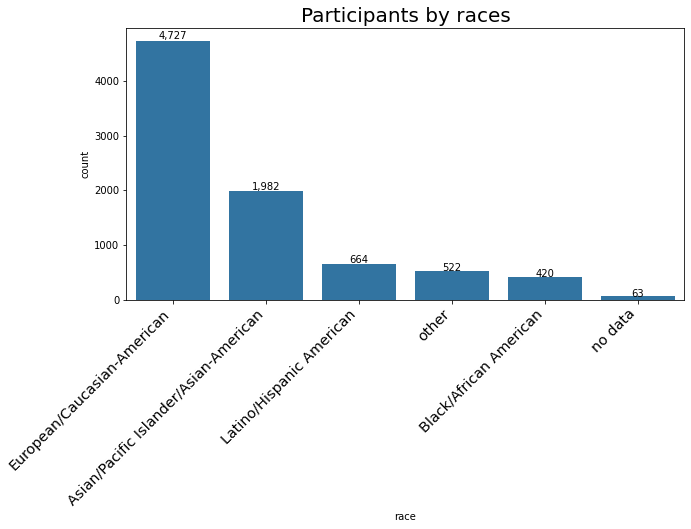

In [19]:
# barchart of races of participants
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[0]
chart = sns.countplot(data = dataset, x='race', color = base_color, order = dataset['race'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', 
                      fontweight='light', fontsize='x-large')
plt.title("Participants by races", fontsize=20)

for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center");

Majority of speed dating participants are Caucasian by race.

<a id='income'></a>
### 2.5 Income of participants

In [20]:
# recoding format of income to int in few steps (1st step, removing NAN values)
dataset.income.fillna("0.00", inplace=True)

In [21]:
# recoding format of income to int in few steps (2nd step, removing string characters)
dataset.income = dataset.income.str.replace((".00"), (""))
dataset.income = dataset.income.str.replace((","), (""))

In [22]:
# checking preliminary results
dataset.income.unique

<bound method Series.unique of 0       69487
1       69487
2       69487
3       69487
4       69487
        ...  
8373        0
8374        0
8375        0
8376        0
8377        0
Name: income, Length: 8378, dtype: object>

In [23]:
# recoding format of income to int in few steps (3rd step, changing data type to integer)
dataset.income = dataset.income.astype(int)

In [24]:
# min and max of income, just for information and better choice for bins
dataset.income.min(), dataset.income.max()

(0, 109031)

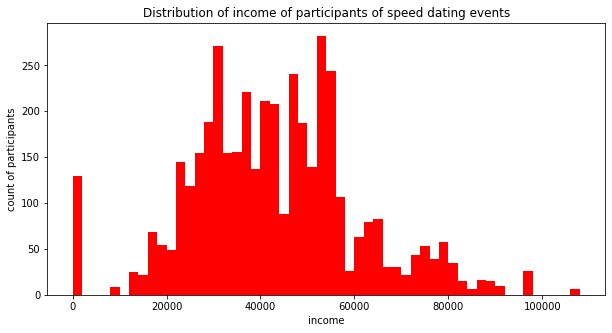

In [25]:
# distribution of income of participants (without 0)
bins = np.arange(dataset.income.min()+0.5,dataset.income.max()+100, 2000)

plt.figure(figsize=(10, 5))
plt.hist(data=dataset, x="income", bins = bins, facecolor = 'r')
plt.title("Distribution of income of participants of speed dating events")
plt.xlabel("income")
plt.ylabel("count of participants")
plt.show()

Apart from group of people without any income, income distribution is showing no big suprises. It is slightly right skewed distribution, which is in line with common assumptions about general population. 

<a id='bivariate'></a>
## 3. Bivariate Exploration
- participants by age and gender
- participants by races and gender
- reasons why people go to speed dating events by gender
- attributes that participants look for in their partners by gender
- income by gender
- match and attributes of participants and their speed dating partners
- match and attributes of men and their speed dating partners
- match and attributes of women and their speed dating partners

<a id='age_gender'></a>
### 3.1 Participants by age and gender

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


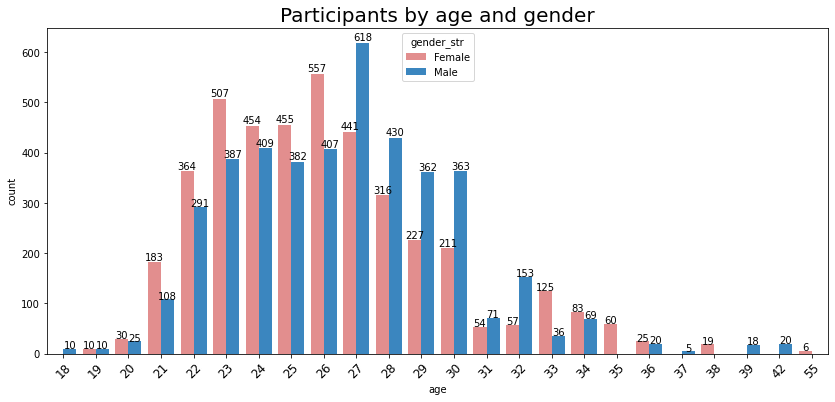

In [26]:
# barchart of participants by age and gender
plt.figure(figsize=(14,6))
palette ={"Female":"#F08080","Male":"#2589D5"}
chart1 = sns.countplot(data = dataset, x='age', hue="gender_str", palette=palette)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45, horizontalalignment='center', 
                      fontweight='light', fontsize=12)
plt.title("Participants by age and gender", fontsize=20)

for p in chart1.patches:
    height = p.get_height()
    chart1.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center");

We can see in most frequent age group (20-30 years old) that women participating in speed dating events are more numerous in younger ages (20-26 years old). On contrary men tend to be more numerous in older ages (from 27 till 32 years old)

<a id='race_gender'></a>
### 3.2 Participants by races and gender

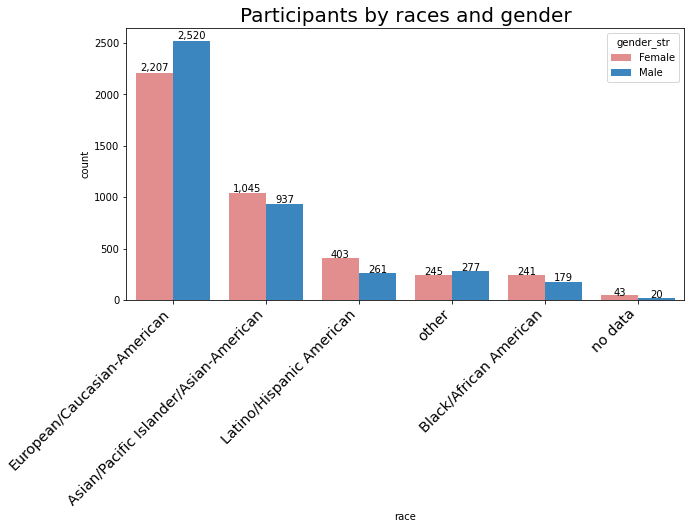

In [27]:
# barchart of participants by race and gender
plt.figure(figsize=(10,5))
palette ={"Female":"#F08080","Male":"#2589D5"}
chart = sns.countplot(data = dataset, x='race', hue="gender_str",
                      palette=palette, order = dataset['race'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', 
                      fontweight='light', fontsize='x-large')
plt.title("Participants by races and gender", fontsize=20)

for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center");

Even though, differences between number of participants by gender and race are not that big, we can see members of minorities on speed dating events are more often women than men. The situation is opposite, when looking on members from caucasian race. Here men are more numerous than women. 

<a id='reasons_gender'></a>
### 3.3 Reasons why people go to speed dating events by gender

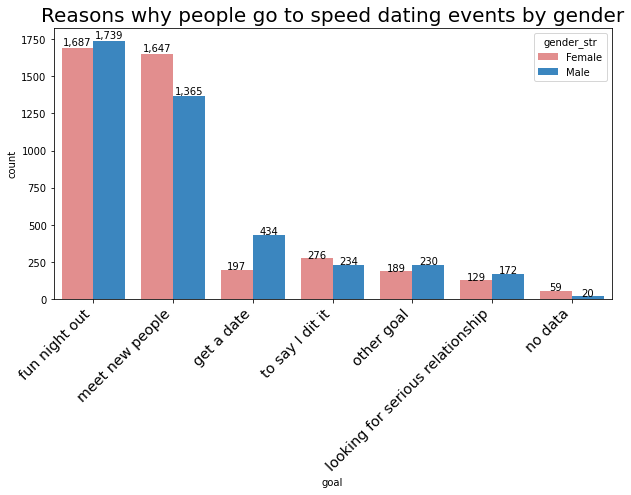

In [28]:
# barchart of reasons for participating in speed dating events (men and women)
plt.figure(figsize=(10,5))

palette ={"Female":"#F08080","Male":"#2589D5"}
chart2 = sns.countplot(data = dataset, x='goal', hue="gender_str", 
                       palette=palette, order = dataset['goal'].value_counts().index)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45, horizontalalignment='right', 
                      fontweight='light', fontsize='x-large')
plt.title("Reasons why people go to speed dating events by gender", fontsize=20)

for p in chart2.patches:
    height = p.get_height()
    chart2.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center");

When comparing reasons why to go to speed dating events for different gender, it is notable that females more often to socialize than men (difference in meet new people reason). Reason to get a date appears 2.2 times more in group of men than women. Other differences between genders are not very big. 

<a id='attribute_gender'></a>
### 3.4 Attributes that participants look for in their partners

In [29]:
# personal traits looked for in partners by gender
gender_param2 = dataset[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1', 'gender_str']].groupby('gender_str').mean()
gender_param2.columns = ['attractive', 'sincere','intelligent','fun','ambitious','shared_interests']
gender_param2

,attractive,sincere,intelligent,fun,ambitious,shared_interests
gender_str,,,,,,
Female,18.055224,18.305008,21.002502,17.147292,12.827222,12.704194
Male,26.921689,16.498436,19.537374,17.763893,8.552829,10.996574


Attractivity of speed dating partner is way more important for men. All the remaining attributes have far less importance for men. 
For women intelligence of speeding partner is the most important attribute. Sincerity and attractivity are 2nd and 3rd most important attributes, quite close to intelligence.

<a id='income_gender'></a>
### 3.5 Income by gender

In [30]:
# creating separate datasets for men and women
male_data = dataset[(dataset.gender_str == "Male")]
female_data = dataset[(dataset.gender_str == "Female")]

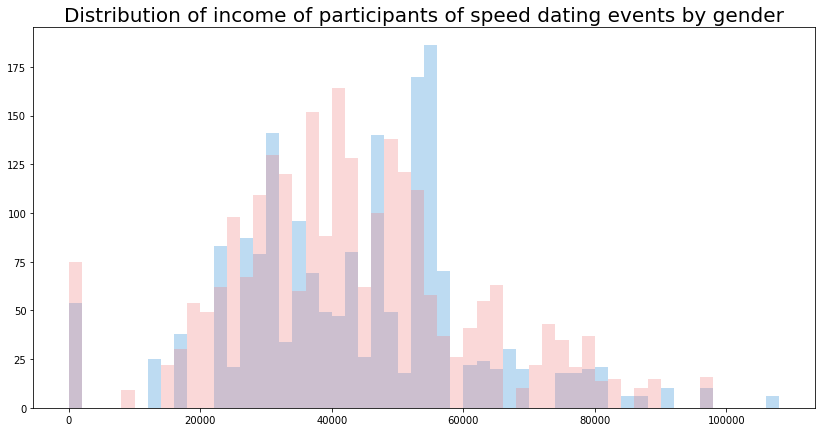

In [31]:
# distribution of income by gender
plt.figure(figsize=(14, 7))
bins = np.arange(dataset.income.min()+0.5,dataset.income.max()+100, 2000)

plt.hist(male_data.income, bins= bins, facecolor = '#2589D5', alpha = 0.3)
plt.hist(female_data.income, bins=bins, facecolor = '#F08080', alpha = 0.3)
plt.title("Distribution of income of participants of speed dating events by gender", fontsize=20)
plt.show()

Actually, I don't observe any significant differences in distribution of income by gender of participants of speed dating events. Both distribution looks more or less the same and also similar to previously viewed distribution of income for all participants, regardless their gender.

<a id='corr_match'></a>
### 3.6 Correlation between match and attributes of participants and their speed dating partners

In [32]:
# selecting quantitative variables for correlation
corr_var = dataset[["match", "int_corr", "samerace", "age_o", "attr_o", 
            "attr3_1", "sinc3_1","intel3_1","fun3_1","amb3_1", "gender", "income", 
                    "date", "go_out", "dec_o", "imprace", "imprelig"]]

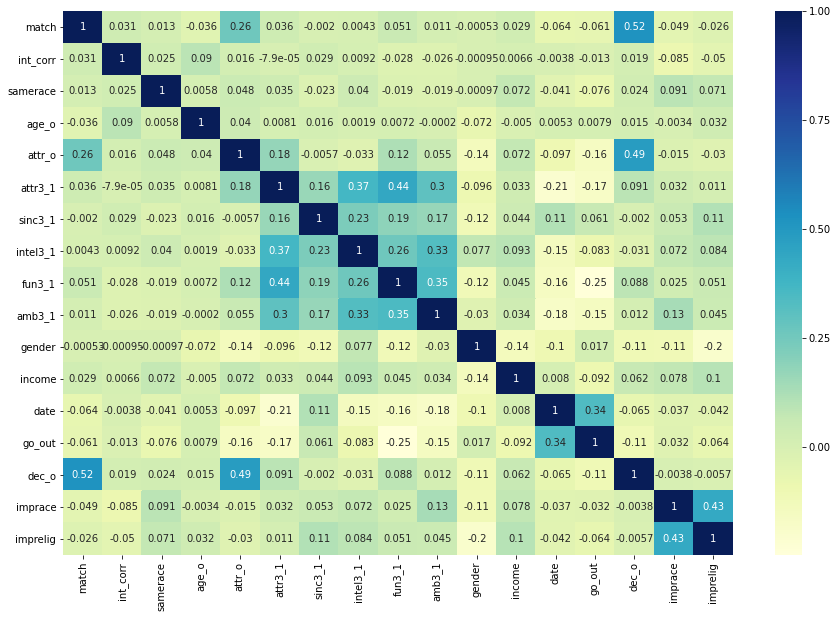

In [33]:
# creating correlation matrice
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_var.corr(), annot=True, ax=ax, cmap="YlGnBu");

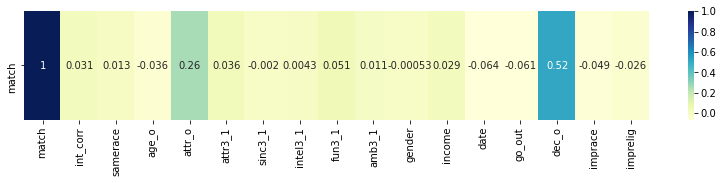

In [34]:
# selecting correlations with match variable
corr_date = (corr_var.corr()).loc[["match"]]
f, ax = plt.subplots(figsize=(14, 2))
sns.heatmap(corr_date, annot=True, ax=ax, cmap="YlGnBu");

We can observe that successful match is strongly correlated with decision to match of counterpart, which is not very suprising. There is also rather mild positive correlation between match and high evalution of sum of attributes by speed dating partner. Other variables do not show any correlation with match.

<a id='corr_men'></a>
### 3.7 Correlation between match and attributes of men and their speed dating partners

In [35]:
# separate datasets for men and women
corr_var_male = male_data[["match", "int_corr", "samerace", "age_o", "attr_o", 
            "attr3_1", "sinc3_1","intel3_1","fun3_1","amb3_1", "income", "date", "go_out", "dec_o", "imprace", "imprelig"]]
corr_var_female = female_data[["match", "int_corr", "samerace", "age_o", "attr_o", 
            "attr3_1", "sinc3_1","intel3_1","fun3_1","amb3_1", "income", "date", "go_out", "dec_o", "imprace", "imprelig"]]

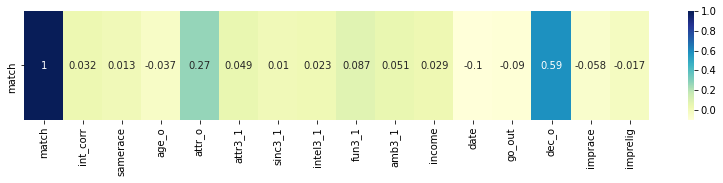

In [36]:
# correlation of match for men participants
corr_date_male = (corr_var_male.corr()).loc[["match"]]
f, ax = plt.subplots(figsize=(14, 2))
sns.heatmap(corr_date_male, annot=True, ax=ax, cmap="YlGnBu");

<a id='corr_women'></a>
### 3.8 Correlation between match and attributes of women and their speed dating partners

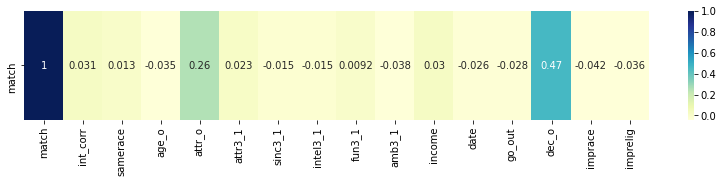

In [37]:
# correlation of match for women participants
corr_date_female = (corr_var_female.corr()).loc[["match"]]
f, ax = plt.subplots(figsize=(14, 2))
sns.heatmap(corr_date_female, annot=True, ax=ax, cmap="YlGnBu");

When comparing macth correlations for men and women, we can see that correlation with high scores on attributes given by speeding partner is not influenced by gender. On the other hand, there is greater difference in relationship between match and decision to match of speed dating partner. Positive correlation between is stronger for men than women, which means men are slightly more successful in matching than women.

<a id='findings'></a>
## 4. Summary of Findings

### Univariate exploration

- We had almost similarily big groups of men and women participanting in speed dating events, which made it suitable for later comparision by gender. Majority of participants belonged to 20 - 30 years old age group. 56 percent of participants belonged to Caucasian race. Income of participants was right skewed as in normal population. Almost 77 % of participants went to speed dating in order to have fun night out or meet new people, only 7,5 % of participants went there to actually get a date and only 3,6 % of participants were looking for serious relationship. Participants look for attractive and intelligent speed dating partners the most.

### Bivariate exploration

- When focusing on difference between speed dating behaviour of men and women, we found out that in general women participating in speed dating events are younger than men and are more represented in groups of minorities when looking on different races. Men participating in speed dating are older and less represented in groups of minorities, but more represented in Caucasian race. No significant difference was observed in income distribution by gender.
- Men in speed dating events are far more interested in finding attractive women, other attributes of women are not that important for men. Women are looking for intelligent men in first place, and attractive and sincere men closely in second and third place. Importance of shared interests or being ambitious is the least important attribute for both genders when speed dating is concerned.
- Successful match is strongly correlated with decision to match of speeding partner. This correlation is slightly stronger for men then for women. In the other words, men get more often their preferable speed dating match they want than women.